In [24]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv('/content/Infrared.csv')  # Ganti path jika perlu

In [25]:
# 3. Cek Dataset
print("Preview Data:")
print(df.head())
print("\nInfo Dataset:")
print(df.info())
print("\nCek Nilai Kosong:")
print(df.isnull().sum())


Preview Data:
   Gender    Age                  Ethnicity  T_atm  Humidity  Distance  \
0    Male  41-50                      White   24.0      28.0       0.8   
1  Female  31-40  Black or African-American   24.0      26.0       0.8   
2  Female  21-30                      White   24.0      26.0       0.8   
3  Female  21-30  Black or African-American   24.0      27.0       0.8   
4    Male  18-20                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHRC1  T_FHLC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.4775  33.3725   
1     0.7800    34.5500    34.5200      33.9300  ...  34.0550  33.6775   
2     0.8625    35.6525    35.5175      34.2775  ...  34.8275  34.6475   
3     0.9300    35.2225    35.6125      34.3850  ...  34.4225  34.6550   
4     0.8950    35.5450    35.6650      34.9100  ...  35.1600  34.3975   

   T_FHBC1  T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  \
0  33.4925  33.0025  

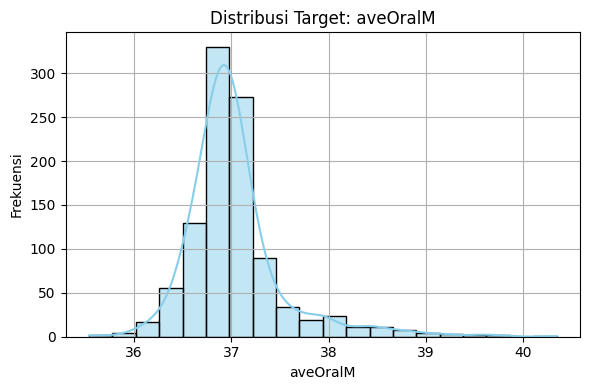

In [36]:
#Visualisasi Distribusi Target
plt.figure(figsize=(6, 4))
sns.histplot(df['aveOralM'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Target: aveOralM')
plt.xlabel('aveOralM')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# 4. Pisahkan fitur dan target
X = df.drop(columns="aveOralM")
y = df["aveOralM"]

In [27]:
# 5. Identifikasi kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=["float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

In [28]:
# 6. Preprocessing
# - numerik: imputasi + scaling
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# - kategorik: one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Gabungkan preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])


In [29]:
# 7. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
# 8. Pipeline Model KNN
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor(n_neighbors=5))  # kamu bisa ubah nilai K di sini
])

In [31]:
# 9. Training Model
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['T_atm', 'Humidity',
                                                   'Distance', 'T_offset1',
                                                   'Max1R13_1', 'Max1L13_1',
                                                   'aveAllR13_1', 'aveAllL13_1',
                                                   'T_RC1', 'T_RC_Dry1',
                                                   'T_RC_Wet1', 'T_RC_Max1',
                                                   'T_LC1', 'T_LC_Dry1',
                                                   'T_LC_Wet1', 'T_LC_Max1',
                                                   'RCC1', 'LCC1', 'canthiMax1',
                                                   'canthi4Max1', 'T_FHCC1',
                                                   'T_FHRC1', 'T_FHLC1',
                                                   'T_FHBC1', 'T_FHTC1',
                                                   'T_FH_Max1', 'T_FHC_Max1',
                                                   'T_Max1', 'T_OR1',
                                                   'T_OR_Max1']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Age',
                                                   'Ethnicity'])])),
                ('regressor', KNeighborsRegressor())])

In [32]:
# 10. Prediksi
y_pred_knn = knn_pipeline.predict(X_test)

In [33]:
# 11. Evaluasi Model
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nHasil Evaluasi K-NN Regressor:")
print("RMSE:", rmse_knn)
print("MSE :", mse_knn)
print("R²  :", r2_knn)


Hasil Evaluasi K-NN Regressor:
RMSE: 0.254483328935085
MSE : 0.06476176470588267
R²  : 0.6924485545755686


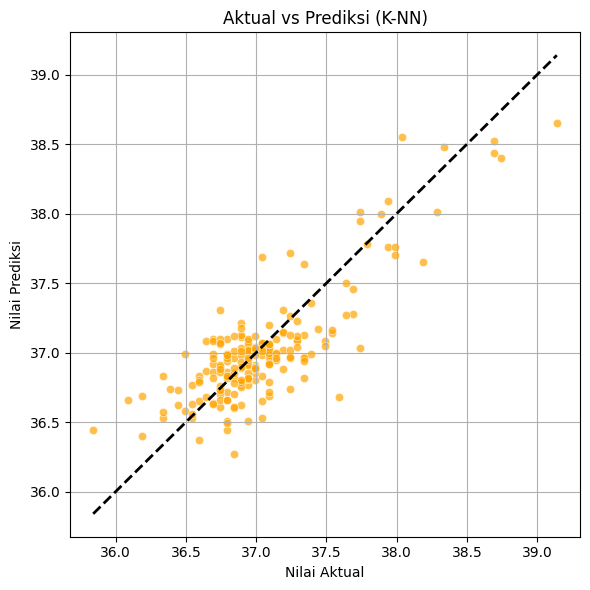

In [34]:
# 12. Visualisasi: Aktual vs Prediksi
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_knn, color='orange', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Aktual vs Prediksi (K-NN)")
plt.grid(True)
plt.tight_layout()
plt.show()

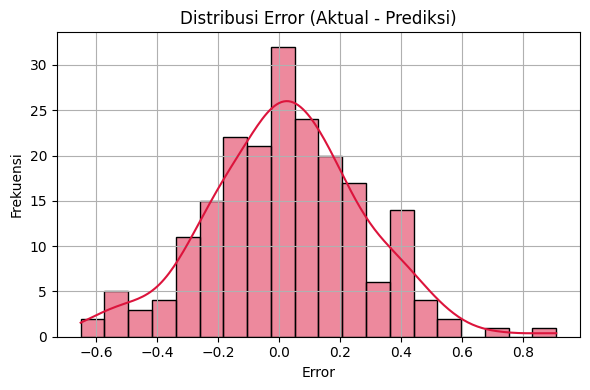

In [37]:
# 13. Visualisasi: Error Distribusi
errors = y_test - y_pred_knn
plt.figure(figsize=(6, 4))
sns.histplot(errors, bins=20, kde=True, color='crimson')
plt.title("Distribusi Error (Aktual - Prediksi)")
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()

# **DECISION TREE**

In [39]:
# 1. Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [40]:
# 2. Pipeline Model Decision Tree
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

In [41]:
# 3. Training Model Decision Tree
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['T_atm', 'Humidity',
                                                   'Distance', 'T_offset1',
                                                   'Max1R13_1', 'Max1L13_1',
                                                   'aveAllR13_1', 'aveAllL13_1',
                                                   'T_RC1', 'T_RC_Dry1',
                                                   'T_RC_Wet1', 'T_RC_Max1',
                                                   'T_LC1', 'T_LC_Dry1',
                                                   'T_LC_Wet1', 'T_LC_Max1',
                                                   'RCC1', 'LCC1', 'canthiMax1',
                                                   'canthi4Max1', 'T_FHCC1',
                                                   'T_FHRC1', 'T_FHLC1',
                                                   'T_FHBC1', 'T_FHTC1',
                                                   'T_FH_Max1', 'T_FHC_Max1',
                                                   'T_Max1', 'T_OR1',
                                                   'T_OR_Max1']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Age',
                                                   'Ethnicity'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [42]:
# 4. Prediksi Decision Tree
y_pred_dt = dt_pipeline.predict(X_test)

In [43]:
# 5. Evaluasi Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nHasil Evaluasi Decision Tree Regressor:")
print("RMSE:", rmse_dt)
print("MSE :", mse_dt)
print("R²  :", r2_dt)


Hasil Evaluasi Decision Tree Regressor:
RMSE: 0.33967617220050095
MSE : 0.11537990196078439
R²  : 0.45206472087155614


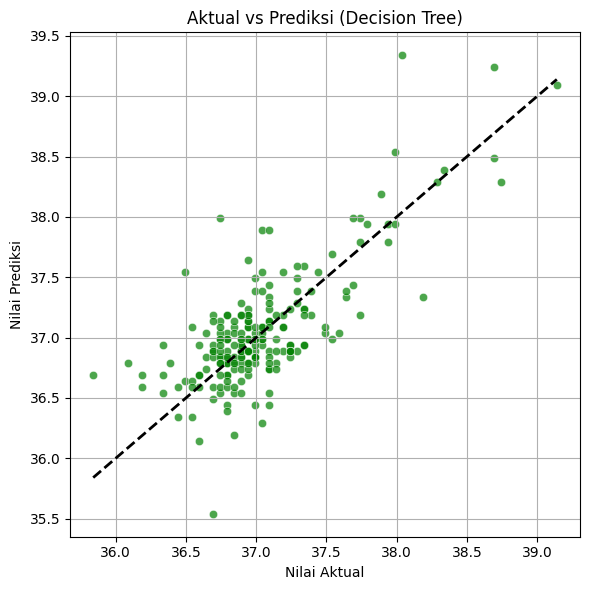

In [44]:
# 6. Visualisasi: Aktual vs Prediksi Decision Tree
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Aktual vs Prediksi (Decision Tree)")
plt.grid(True)
plt.tight_layout()
plt.show()

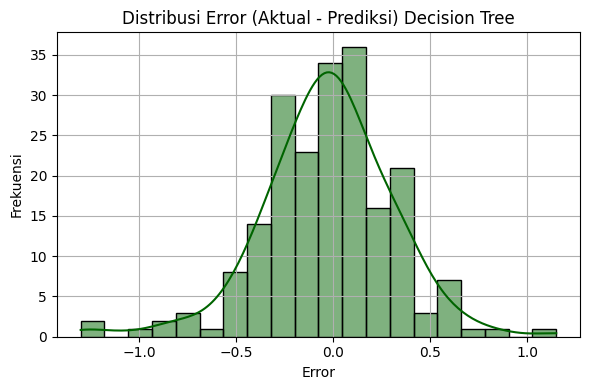

In [45]:
# 7. Visualisasi: Error Distribusi Decision Tree
errors_dt = y_test - y_pred_dt
plt.figure(figsize=(6, 4))
sns.histplot(errors_dt, bins=20, kde=True, color='darkgreen')
plt.title("Distribusi Error (Aktual - Prediksi) Decision Tree")
plt.xlabel("Error")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()

# **PERBANDINGAN KNN VS DECISION TREE**

In [46]:
# Perbandingan K-NN dan Decision Tree
model_names = ['K-NN', 'Decision Tree']
rmse_values = [rmse_knn, rmse_dt]
mse_values = [mse_knn, mse_dt]
r2_values = [r2_knn, r2_dt]

# Membuat DataFrame untuk perbandingan
comparison_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_values,
    'MSE': mse_values,
    'R²': r2_values
})

print("\nPerbandingan Hasil K-NN dan Decision Tree:")
print(comparison_df)


Perbandingan Hasil K-NN dan Decision Tree:
           Model      RMSE       MSE        R²
0           K-NN  0.254483  0.064762  0.692449
1  Decision Tree  0.339676  0.115380  0.452065


<ipython-input-47-4fc438424a55>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=comparison_df, palette='coolwarm')


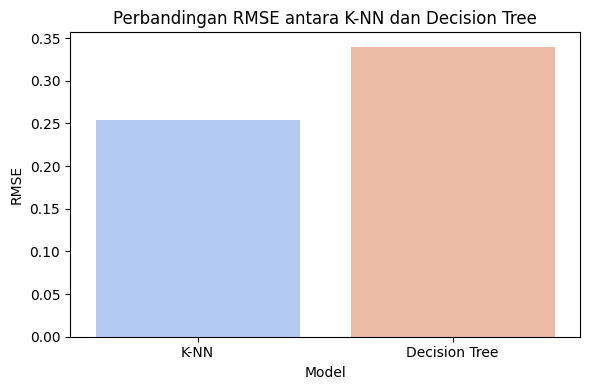

In [47]:
# Visualisasi Perbandingan RMSE
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='RMSE', data=comparison_df, palette='coolwarm')
plt.title('Perbandingan RMSE antara K-NN dan Decision Tree')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

<ipython-input-48-b554afb26ee6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=comparison_df, palette='coolwarm')


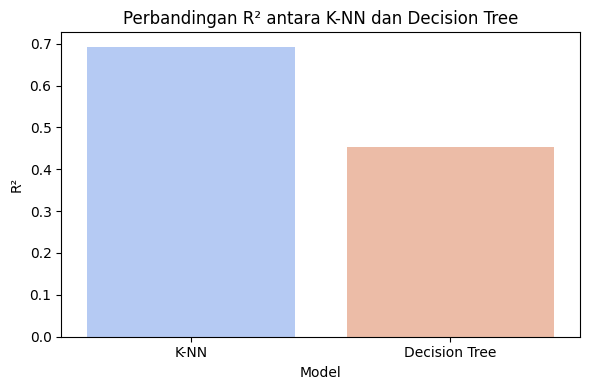

In [48]:
# Visualisasi Perbandingan R²
plt.figure(figsize=(6, 4))
sns.barplot(x='Model', y='R²', data=comparison_df, palette='coolwarm')
plt.title('Perbandingan R² antara K-NN dan Decision Tree')
plt.ylabel('R²')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

# **KESIMPULAN**

Dari hasil perbandingan antara K-NN dan Decision Tree, dapat disimpulkan sebagai berikut:

### 1. **RMSE (Root Mean Squared Error):**
- K-NN memiliki RMSE yang lebih rendah (**0.254**) dibandingkan dengan Decision Tree (**0.340**).
- Ini menunjukkan bahwa model **K-NN** lebih akurat dalam memprediksi nilai target (**aveOralM**) dibandingkan **Decision Tree**.

### 2. **MSE (Mean Squared Error):**
- Sama seperti RMSE, MSE untuk **K-NN** lebih rendah (**0.065**) daripada **Decision Tree** (**0.115**).
- Ini juga menunjukkan bahwa **K-NN** memiliki performa yang lebih baik dalam hal **error kuadrat rata-rata**.

### 3. **R² (R-squared):**
- R² untuk **K-NN** adalah **0.692**, yang berarti model **K-NN** menjelaskan sekitar **69.2%** dari variansi dalam data target.
- R² untuk **Decision Tree** adalah **0.452**, yang berarti model **Decision Tree** hanya menjelaskan sekitar **45.2%** dari variansi target.
- Ini menunjukkan bahwa **K-NN** jauh lebih baik dalam menangkap pola dalam data dibandingkan **Decision Tree**.

### **Kesimpulan Umum:**
- **K-NN** secara keseluruhan lebih baik dalam hal **akurasi** dan **kemampuan prediksi** dibandingkan dengan **Decision Tree** pada dataset ini, dengan **RMSE** dan **MSE** yang lebih rendah serta **R²** yang lebih tinggi.
- **Decision Tree** cenderung memiliki **overfitting** atau performa yang kurang baik dalam hal **generalisasi**, karena **R²** yang lebih rendah.

Dengan demikian, model **K-NN** lebih direkomendasikan untuk digunakan dalam prediksi target **aveOralM** pada dataset ini.


# **Metrik Evaluasi dalam Regresi Linear**

### **Mean Squared Error (MSE)**
MSE adalah rata-rata kuadrat dari selisih antara nilai aktual (\( y_i \)) dan nilai prediksi (\( \hat{y}_i \)):

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

### **Root Mean Squared Error (RMSE)**
RMSE adalah akar kuadrat dari MSE, yang memiliki satuan yang sama dengan data asli:

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

---

### **R-squared (R²)**
R² mengukur seberapa baik model menjelaskan variasi dalam data:

$$
R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
$$

Dengan:

$$
SS_{res} = \sum (y_i - \hat{y}_i)^2
$$

$$
SS_{tot} = \sum (y_i - \bar{y})^2
$$

- \( SS_{res} \) = jumlah kuadrat residual (error)  
- \( SS_{tot} \) = jumlah kuadrat total  

**Interpretasi:**
- Jika **\( R^2 \approx 1 \)** → Model sangat baik  
- Jika **\( R^2 \approx 0 \)** → Model kurang baik  

---

